In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("RedWineQuality.csv")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Dropping the first column containing the index values
df = df.iloc[:,1:]
print(df)

      citric acid  residual sugar  chlorides  free sulfur dioxide  \
0            0.00             1.9      0.076                 11.0   
1            0.00             2.6      0.098                 25.0   
2            0.04             2.3      0.092                 15.0   
3            0.56             1.9      0.075                 17.0   
4            0.00             1.9      0.076                 11.0   
...           ...             ...        ...                  ...   
1594         0.08             2.0      0.090                 32.0   
1595         0.10             2.2      0.062                 39.0   
1596         0.13             2.3      0.076                 29.0   
1597         0.12             2.0      0.075                 32.0   
1598         0.47             3.6      0.067                 18.0   

      total sulfur dioxide  density    pH  sulphates  alcohol  quality  
0                     34.0  0.99780  3.51       0.56      9.4        5  
1                     67.

Now we are left with 10 columns in our dataframe out of which 1 column contain the quality of wine and other 9 columns contain other properties such as acidity,pH, density etc.

In [7]:
df.describe()

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This is used to view some  statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [8]:
df.corr()['quality']

citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

# HeatMap of correlation Matrix

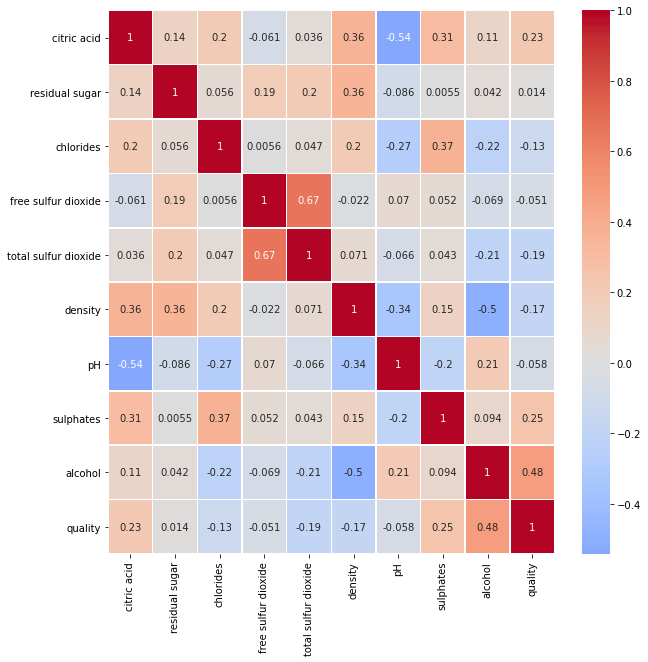

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

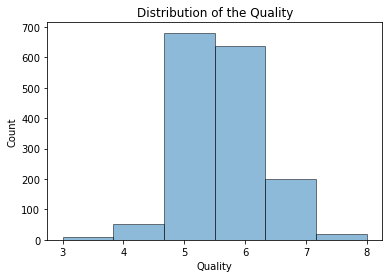

In [10]:
plt.hist(df.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

The above plot shows the distribution of the quality of the wine in the dataset, and represents that most of the wine is of average quality i.e. quality ranging from 5-7 .

E:\war\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


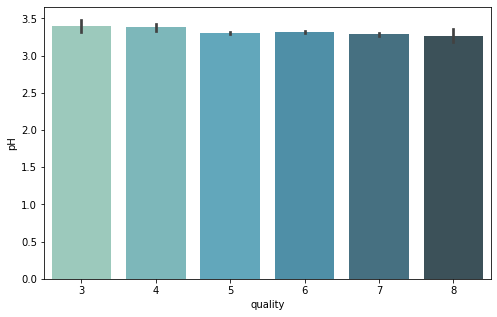

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(df['quality'],df['pH'],palette="GnBu_d")
plt.show()

From the barplot of qulaity vs ph we can visualize that there is a slight decrease in pH with the increase in quality of the wine.

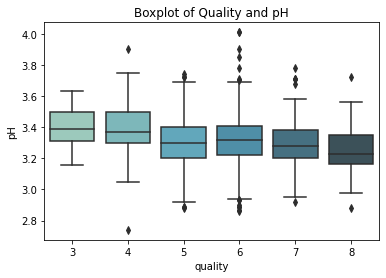

In [13]:
sns.boxplot(x='quality',y='pH',data=df,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

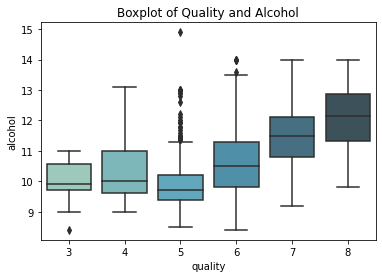

In [14]:
ax = sns.boxplot(x='quality',y='alcohol',data=df,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

The above plot shows the increase in the quality of wine with the increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine better will be the quality.

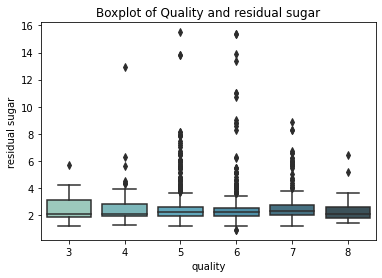

In [16]:
sns.boxplot(x="quality",y="residual sugar",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

There is not much effect of the residual sugar on the quality of the wine.

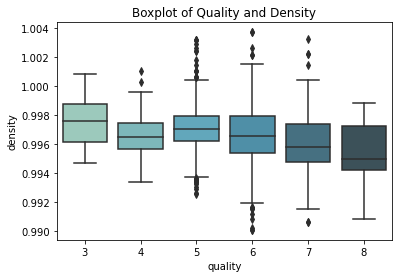

In [17]:
sns.boxplot(x="quality",y="density",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()

Lower the density of wine better will be the quality of the wine. From the above boxplot we acn visualize that the quality of wine increases with decrease in density.

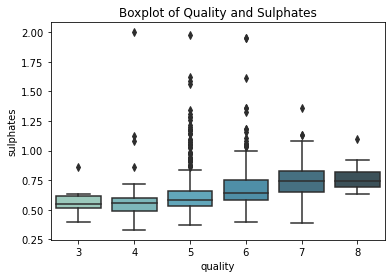

In [19]:
sns.boxplot(x="quality",y="sulphates",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

The above plot represents that the quality of alcohol increases with the increase in the amount of sulphates in the wine.

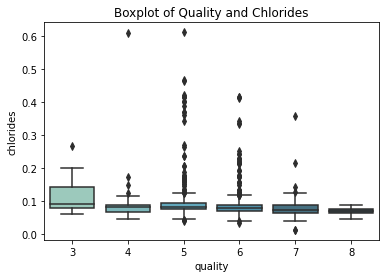

In [20]:
sns.boxplot(x="quality",y="chlorides",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Chlorides")
plt.show()

From the above plot we can see that there is not even a slight change in the quality of wine for a particular amount of chlorides mixed in them.

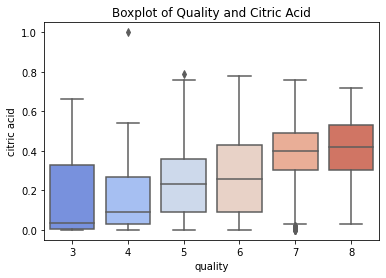

In [22]:
sns.boxplot(x="quality",y="citric acid",data=df,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

The quality of the wine increses with increase in the amount of citric acid in the wine.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = df.iloc[:,:11].values
Y = df.iloc[:,-1].values

#Splitting the dataset into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Training using Logistic Regression
cl = LogisticRegression()
cl.fit(X_train,Y_train)

#Making confusion matrix
cm = confusion_matrix(Y_test,cl.predict(X_test))
print(cm)

[[  0   2   0   0   0   0]
 [  0  13   1   0   0   0]
 [  0   0 169   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0  40   0]
 [  0   0   0   0   4   1]]


In [41]:
#Applying SVM
from sklearn.svm import SVC
cl = SVC(kernel="rbf")
cl.fit(X_train,Y_train)

cm = confusion_matrix(Y_test,cl.predict(X_test))
print(cm)

[[  0   1   1   0   0   0]
 [  0  11   2   1   0   0]
 [  0   0 169   0   0   0]
 [  0   0   1 169   0   0]
 [  0   0   0   0  40   0]
 [  0   0   0   0   4   1]]


By this data here we understood that The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine better will be the quality. Quality and Alcohol make a wine good.